In [1]:
#core
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, r2_score
from xgboost import XGBRegressor

In [2]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df = pd.read_csv("konkur_results.csv")
df.head(10)

,کارنامه سال,سهمیه,قبولی,رتبه سهمیه زیرگروه ۱,رتبه سهمیه زیرگروه ۲,رتبه سهمیه زیرگروه ۳,رتبه سهمیه زیرگروه ۴,معدل موثر,زبان انگلیسی,مجموعه ریاضیات,...,دروس تخصصی ۳,دروس تخصصی ۴,رتبه کشور زیرگروه ۱,رتبه کشور زیرگروه ۲,رتبه کشور زیرگروه ۳,رتبه کشور زیرگروه ۴,میانگین درصد ضریب ۱,میانگین درصد ضریب ۲,میانگین درصد ضریب ۳,میانگین درصد ضریب ۴
0,1404,0,هوش مصنوعی شریف,4,2,3,2,20.00,76.00,25.00,...,75.00,36.67,4,2,3,2,62.18,66.62,64.73,64.96
1,1404,0,نرم افزار شریف,6,5,7,6,19.67,96.00,38.33,...,38.33,60.00,7,5,8,6,58.62,61.07,57.18,60.07
2,1404,0,-,7,10,6,7,18.15,82.67,33.33,...,63.33,73.33,8,11,7,8,60.18,58.40,59.51,58.62
3,1404,0,هوش مصنوعی شریف,10,12,10,9,20.00,8.00,33.33,...,76.67,53.33,11,13,11,10,54.87,54.09,56.42,55.87
4,1404,0,هوش مصنوعی تهران بورسیه همراه اول,15,33,16,18,19.00,70.67,35.00,...,63.33,60.00,17,36,18,20,51.82,48.71,52.04,51.38
5,1404,0,بیوانفورماتیک شریف,21,21,26,25,17.00,49.33,55.00,...,41.67,53.33,23,23,29,27,50.51,51.29,49.73,50.07
6,1404,0,نرم افزار تهران,33,101,33,59,18.78,90.67,-3.32,...,81.67,80.00,37,111,37,64,50.05,42.05,50.16,45.93
7,1404,0,هوش مصنوعی تهران نوبت دوم,34,38,34,37,16.53,73.33,31.67,...,51.67,56.67,38,41,38,41,51.11,50.89,50.78,49.89
8,1404,0,-,37,36,32,29,18.08,60.00,23.33,...,60.00,40.00,41,39,36,31,48.78,49.33,50.11,50.67
9,1404,0,-,41,27,41,33,17.55,24.00,5.00,...,46.67,46.67,45,30,45,46,49.38,53.60,49.38,50.71


In [3]:
feature_names = df.columns.tolist()
feature_names

['کارنامه سال',
 'سهمیه',
 'قبولی',
 'رتبه سهمیه زیرگروه ۱',
 'رتبه سهمیه زیرگروه ۲',
 'رتبه سهمیه زیرگروه ۳',
 'رتبه سهمیه زیرگروه ۴',
 'معدل موثر',
 'زبان انگلیسی',
 'مجموعه ریاضیات',
 'دروس تخصصی ۱',
 'دروس تخصصی ۲',
 'دروس تخصصی ۳',
 'دروس تخصصی ۴',
 'رتبه کشور زیرگروه ۱',
 'رتبه کشور زیرگروه ۲',
 'رتبه کشور زیرگروه ۳',
 'رتبه کشور زیرگروه ۴',
 'میانگین درصد ضریب ۱',
 'میانگین درصد ضریب ۲',
 'میانگین درصد ضریب ۳',
 'میانگین درصد ضریب ۴']

**Translate Features**

In [13]:
persian_to_english = {
    'کارنامه سال': 'year',
    'سهمیه': 'quota',
    'قبولی': 'acceptance',
    'رتبه سهمیه زیرگروه ۱': 'quota_rank_s1',
    'رتبه سهمیه زیرگروه ۲': 'quota_rank_s2',
    'رتبه سهمیه زیرگروه ۳': 'quota_rank_s3',
    'رتبه سهمیه زیرگروه ۴': 'quota_rank_s4',
    'معدل موثر': 'effective_gpa',
    'زبان انگلیسی': 'english',
    'مجموعه ریاضیات': 'mathematics',
    'دروس تخصصی ۱': 'specialized_courses_1',
    'دروس تخصصی ۲': 'specialized_courses_2',
    'دروس تخصصی ۳': 'specialized_courses_3',
    'دروس تخصصی ۴': 'specialized_courses_4',
    'رتبه کشور زیرگروه ۱': 'country_rank_s1',
    'رتبه کشور زیرگروه ۲': 'country_rank_s2',
    'رتبه کشور زیرگروه ۳': 'country_rank_s3',
    'رتبه کشور زیرگروه ۴': 'country_rank_s4',
    'میانگین درصد ضریب ۱': 'avg_percentage_coef_1',
    'میانگین درصد ضریب ۲': 'avg_percentage_coef_2',
    'میانگین درصد ضریب ۳': 'avg_percentage_coef_3',
    'میانگین درصد ضریب ۴': 'avg_percentage_coef_4'
}

# df.rename(columns=persian_to_english, inplace=True)
# print(df.shape)
# df.head()

**Basic EDA**

In [4]:
#swapping '-' with nan
df = df.replace(['-', '', 'N/A', 'NULL', 'null'], np.nan)

pd.concat([df.count(), df.isnull().sum(), df.nunique(), df.dtypes], 
          axis=1, 
          keys=['non_null', 'null', 'unique', 'dtype'])

,non_null,null,unique,dtype
کارنامه سال,654,0,1,int64
سهمیه,654,0,3,int64
قبولی,309,345,162,object
رتبه سهمیه زیرگروه ۱,654,0,581,object
رتبه سهمیه زیرگروه ۲,654,0,563,object
رتبه سهمیه زیرگروه ۳,654,0,575,object
رتبه سهمیه زیرگروه ۴,654,0,559,object
معدل موثر,654,0,366,float64
زبان انگلیسی,654,0,77,float64
مجموعه ریاضیات,654,0,40,float64


In [5]:
rank_cols = [
 'رتبه سهمیه زیرگروه ۱','رتبه سهمیه زیرگروه ۲','رتبه سهمیه زیرگروه ۳','رتبه سهمیه زیرگروه ۴',
 'رتبه کشور زیرگروه ۱','رتبه کشور زیرگروه ۲','رتبه کشور زیرگروه ۳','رتبه کشور زیرگروه ۴'
]

df[[c for c in rank_cols if c.startswith('رتبه کشور')]].describe().T

,count,unique,top,freq
رتبه کشور زیرگروه ۱,654,599,392,3
رتبه کشور زیرگروه ۲,654,583,"1,737",3
رتبه کشور زیرگروه ۳,654,593,"2,788",3
رتبه کشور زیرگروه ۴,654,584,"2,052",3


**Drop Rows**

In [6]:
constant = ['کارنامه سال']
skip_for_now = ['قبولی']
country_rank = ['رتبه کشور زیرگروه ۱','رتبه کشور زیرگروه ۲','رتبه کشور زیرگروه ۳','رتبه کشور زیرگروه ۴']

df.drop(columns= constant + skip_for_now + country_rank, inplace=True)
print('Following Features Succesfully have been Dropped!')

Following Features Succesfully have been Dropped!


In [7]:
df.head(10)

,سهمیه,رتبه سهمیه زیرگروه ۱,رتبه سهمیه زیرگروه ۲,رتبه سهمیه زیرگروه ۳,رتبه سهمیه زیرگروه ۴,معدل موثر,زبان انگلیسی,مجموعه ریاضیات,دروس تخصصی ۱,دروس تخصصی ۲,دروس تخصصی ۳,دروس تخصصی ۴,میانگین درصد ضریب ۱,میانگین درصد ضریب ۲,میانگین درصد ضریب ۳,میانگین درصد ضریب ۴
0,0,4,2,3,2,20.00,76.00,25.00,100.00,78.33,75.00,36.67,62.18,66.62,64.73,64.96
1,0,6,5,7,6,19.67,96.00,38.33,53.33,81.67,38.33,60.00,58.62,61.07,57.18,60.07
2,0,7,10,6,7,18.15,82.67,33.33,60.00,50.00,63.33,73.33,60.18,58.40,59.51,58.62
3,0,10,12,10,9,20.00,8.00,33.33,50.00,68.33,76.67,53.33,54.87,54.09,56.42,55.87
4,0,15,33,16,18,19.00,70.67,35.00,23.33,53.33,63.33,60.00,51.82,48.71,52.04,51.38
5,0,21,21,26,25,17.00,49.33,55.00,60.00,46.67,41.67,53.33,50.51,51.29,49.73,50.07
6,0,33,101,33,59,18.78,90.67,-3.32,23.33,18.33,81.67,80.00,50.05,42.05,50.16,45.93
7,0,34,38,34,37,16.53,73.33,31.67,66.67,38.33,51.67,56.67,51.11,50.89,50.78,49.89
8,0,37,36,32,29,18.08,60.00,23.33,40.00,68.33,60.00,40.00,48.78,49.33,50.11,50.67
9,0,41,27,41,33,17.55,24.00,5.00,90.00,66.67,46.67,46.67,49.38,53.60,49.38,50.71


**Convert Columns**

In [8]:
rank_cols = [
    'رتبه سهمیه زیرگروه ۱',
    'رتبه سهمیه زیرگروه ۲', 
    'رتبه سهمیه زیرگروه ۳',
    'رتبه سهمیه زیرگروه ۴',
]

percentage_cols = [
    'زبان انگلیسی',
    'مجموعه ریاضیات',
    'دروس تخصصی ۱',
    'دروس تخصصی ۲',
    'دروس تخصصی ۳',
    'دروس تخصصی ۴'
]

for col in rank_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].str.replace(',', '', regex=False).str.replace('-', '0', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in percentage_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df[percentage_cols].dtypes

زبان انگلیسی      float64
مجموعه ریاضیات    float64
دروس تخصصی ۱      float64
دروس تخصصی ۲      float64
دروس تخصصی ۳      float64
دروس تخصصی ۴      float64
dtype: object

In [9]:
test = ['میانگین درصد ضریب ۱',
    'میانگین درصد ضریب ۲',
    'میانگین درصد ضریب ۳', 
    'میانگین درصد ضریب ۴'
]
df.drop(columns= test, inplace=True)

In [10]:
corr = df.corr()
corr

,سهمیه,رتبه سهمیه زیرگروه ۱,رتبه سهمیه زیرگروه ۲,رتبه سهمیه زیرگروه ۳,رتبه سهمیه زیرگروه ۴,معدل موثر,زبان انگلیسی,مجموعه ریاضیات,دروس تخصصی ۱,دروس تخصصی ۲,دروس تخصصی ۳,دروس تخصصی ۴
سهمیه,1.000000,-0.208246,-0.211146,-0.208176,-0.211638,-0.069494,-0.057954,-0.006736,-0.005540,-0.031923,-0.119404,-0.018719
رتبه سهمیه زیرگروه ۱,-0.208246,1.000000,0.983015,0.992255,0.990120,-0.309165,-0.179174,-0.281520,-0.463451,-0.449204,-0.467341,-0.528347
رتبه سهمیه زیرگروه ۲,-0.211146,0.983015,1.000000,0.985103,0.993889,-0.320713,-0.183786,-0.289126,-0.506675,-0.483244,-0.445046,-0.487955
رتبه سهمیه زیرگروه ۳,-0.208176,0.992255,0.985103,1.000000,0.995274,-0.316572,-0.185338,-0.282001,-0.471743,-0.452006,-0.494399,-0.491997
رتبه سهمیه زیرگروه ۴,-0.211638,0.990120,0.993889,0.995274,1.000000,-0.319801,-0.184328,-0.284453,-0.478098,-0.481539,-0.475616,-0.494601
معدل موثر,-0.069494,-0.309165,-0.320713,-0.316572,-0.319801,1.000000,0.189423,0.214743,0.248857,0.228014,0.207738,0.153621
زبان انگلیسی,-0.057954,-0.179174,-0.183786,-0.185338,-0.184328,0.189423,1.000000,0.226288,0.042745,0.080418,0.048500,0.067622
مجموعه ریاضیات,-0.006736,-0.281520,-0.289126,-0.282001,-0.284453,0.214743,0.226288,1.000000,0.295800,0.343695,0.183924,0.163182
دروس تخصصی ۱,-0.005540,-0.463451,-0.506675,-0.471743,-0.478098,0.248857,0.042745,0.295800,1.000000,0.475206,0.476341,0.318714
دروس تخصصی ۲,-0.031923,-0.449204,-0.483244,-0.452006,-0.481539,0.228014,0.080418,0.343695,0.475206,1.000000,0.481988,0.449541


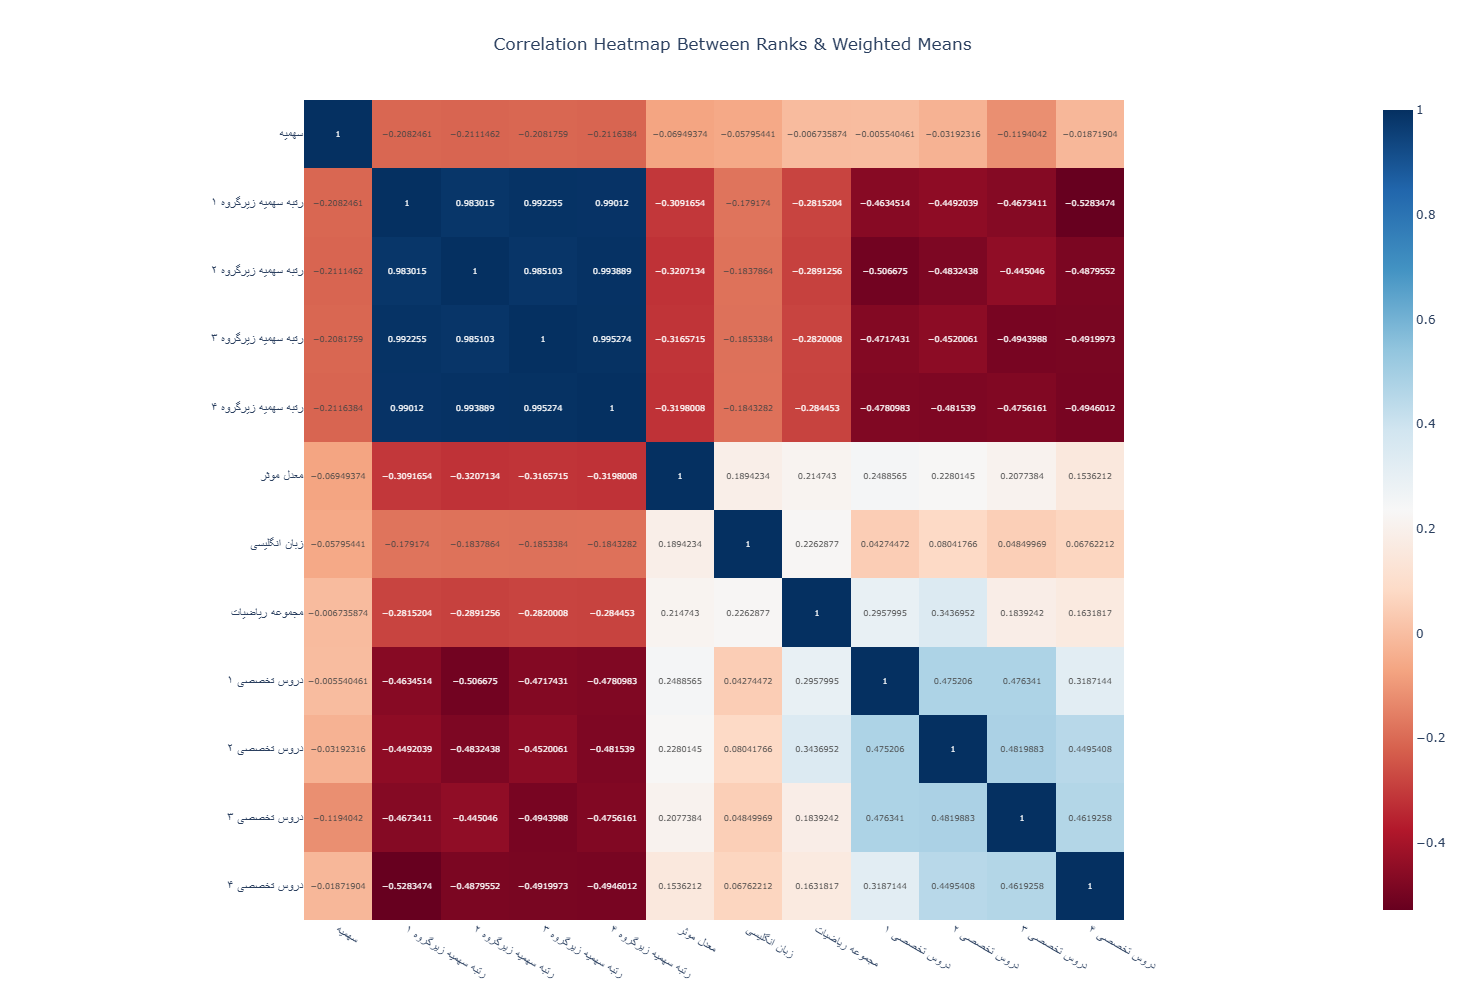

In [11]:
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu',
    title='Correlation Heatmap Between Ranks & Weighted Means'
)

fig.update_layout(width=1400, height=1000, title_x=0.5)
fig.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   سهمیه                 654 non-null    int64  
 1   رتبه سهمیه زیرگروه ۱  654 non-null    int64  
 2   رتبه سهمیه زیرگروه ۲  654 non-null    int64  
 3   رتبه سهمیه زیرگروه ۳  654 non-null    int64  
 4   رتبه سهمیه زیرگروه ۴  654 non-null    int64  
 5   معدل موثر             654 non-null    float64
 6   زبان انگلیسی          654 non-null    float64
 7   مجموعه ریاضیات        654 non-null    float64
 8   دروس تخصصی ۱          654 non-null    float64
 9   دروس تخصصی ۲          654 non-null    float64
 10  دروس تخصصی ۳          654 non-null    float64
 11  دروس تخصصی ۴          654 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 61.4 KB


In [13]:
df.describe()

,سهمیه,رتبه سهمیه زیرگروه ۱,رتبه سهمیه زیرگروه ۲,رتبه سهمیه زیرگروه ۳,رتبه سهمیه زیرگروه ۴,معدل موثر,زبان انگلیسی,مجموعه ریاضیات,دروس تخصصی ۱,دروس تخصصی ۲,دروس تخصصی ۳,دروس تخصصی ۴
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,1.047401,1436.331804,1432.050459,1440.951070,1428.333333,17.400581,31.630336,7.057859,26.832630,19.184801,23.695917,26.354893
std,3.083208,2073.065239,2037.893201,2076.529773,2021.968080,1.480179,29.668169,10.506427,20.605608,16.724057,19.749126,16.444404
min,0.000000,1.000000,2.000000,1.000000,1.000000,13.120000,-8.000000,-13.320000,-23.320000,-11.660000,-11.660000,-8.320000
25%,0.000000,229.000000,234.750000,241.250000,242.250000,16.372500,4.000000,0.000000,10.000000,6.670000,6.670000,15.000000
50%,0.000000,641.000000,658.000000,649.000000,656.000000,17.305000,25.330000,3.330000,26.670000,15.835000,21.670000,25.000000
75%,0.000000,1775.000000,1817.500000,1718.250000,1762.000000,18.577500,53.330000,11.670000,40.000000,28.330000,38.330000,36.670000
max,25.000000,13212.000000,13286.000000,12993.000000,12663.000000,20.000000,100.000000,55.000000,100.000000,81.670000,88.330000,80.000000


In [14]:
df

,سهمیه,رتبه سهمیه زیرگروه ۱,رتبه سهمیه زیرگروه ۲,رتبه سهمیه زیرگروه ۳,رتبه سهمیه زیرگروه ۴,معدل موثر,زبان انگلیسی,مجموعه ریاضیات,دروس تخصصی ۱,دروس تخصصی ۲,دروس تخصصی ۳,دروس تخصصی ۴
0,0,4,2,3,2,20.00,76.00,25.00,100.00,78.33,75.00,36.67
1,0,6,5,7,6,19.67,96.00,38.33,53.33,81.67,38.33,60.00
2,0,7,10,6,7,18.15,82.67,33.33,60.00,50.00,63.33,73.33
3,0,10,12,10,9,20.00,8.00,33.33,50.00,68.33,76.67,53.33
4,0,15,33,16,18,19.00,70.67,35.00,23.33,53.33,63.33,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
649,25,11,12,14,14,17.00,25.33,15.00,36.67,18.33,18.33,28.33
650,25,42,44,44,42,13.81,0.00,25.00,3.33,15.00,-1.66,30.00
651,25,51,45,61,49,17.97,25.33,5.00,16.67,13.33,-11.66,16.67
652,25,52,47,58,47,17.17,28.00,6.67,16.67,13.33,-5.00,13.33


**Model Builder**

In [30]:
def train_all_subgroups(df, model_builder):
    targets = {
        "subgroup1": "رتبه سهمیه زیرگروه ۱",
        "subgroup2": "رتبه سهمیه زیرگروه ۲",
        "subgroup3": "رتبه سهمیه زیرگروه ۳",
        "subgroup4": "رتبه سهمیه زیرگروه ۴"
    }

    rank_cols = list(targets.values())
    results = {}
    models = {}

    for name, target_col in targets.items():
        X = df.drop(columns=rank_cols)
        X = X.select_dtypes(include=[np.number])
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        model = model_builder()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = {
            "MAE": mean_absolute_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "MAPE": mean_absolute_percentage_error(y_test, y_pred),
            "R2": r2_score(y_test, y_pred)
        }

        # feature importances for XGB, coefficients for Linear Regression
        if hasattr(model, "coef_"):
            results[name]["coefficients"] = dict(zip(X.columns, model.coef_))
        else:
            results[name]["feature_importances"] = dict(
                zip(X.columns, model.feature_importances_)
            )

        models[name] = model

    return results, models

**Linear Reg**

In [16]:
def lr():
    return LinearRegression()

lr_results, lr_models = train_all_subgroups(df, lr)

In [17]:
summary = []

for name, m in lr_results.items():
    summary.append([
        name,
        m["MAE"],
        m["RMSE"],
        m["MAPE"],
        m["R2"]
    ])

summary_df = pd.DataFrame(summary, columns=["Model", "MAE", "RMSE", "MAPE", "R2"])
summary_df

,Model,MAE,RMSE,MAPE,R2
0,subgroup1,937.278376,1437.120904,8.460108,0.480843
1,subgroup2,881.600341,1335.552632,6.705489,0.500543
2,subgroup3,949.405020,1459.332685,8.238915,0.488686
3,subgroup4,901.173155,1372.020774,7.244053,0.496580


**Xgboost**

In [99]:
def xgb():
    return XGBRegressor(

        n_estimators= 290,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight= 7,
        reg_alpha=1,
        reg_lambda=3,
        gamma=2,
        random_state=42
    )

xgb_results, xgb_models = train_all_subgroups(df, xgb)

In [100]:
summary = []

for name, m in xgb_results.items():
    summary.append([
        name,
        m["MAE"],
        m["RMSE"],
        m["MAPE"],
        m["R2"]
    ])

summary_df = pd.DataFrame(summary, columns=["Model", "MAE", "RMSE", "MAPE", "R2"])
summary_df

,Model,MAE,RMSE,MAPE,R2
0,subgroup1,334.180878,611.831676,1.014995,0.905903
1,subgroup2,344.102875,670.234054,0.964657,0.874215
2,subgroup3,332.990051,635.298429,0.978468,0.903098
3,subgroup4,355.774689,635.083434,1.000898,0.892137


**Test**

In [101]:
sample_student = {
    "سهمیه": 0,
    "معدل موثر": 18.00,
    "زبان انگلیسی": 66.00,
    "مجموعه ریاضیات": 40.00,
    "دروس تخصصی ۱": 33.00,
    "دروس تخصصی ۲": 55.00,
    "دروس تخصصی ۳": 18.00,
    "دروس تخصصی ۴": 27.00
}

xxx = pd.DataFrame([sample_student])
for subgroup, model in xgb_models.items():
    raw_pred = model.predict(xxx)[0]
    pred = max(1, round(raw_pred))
    print(subgroup, "→ Predicted Rank:", pred)

subgroup1 → Predicted Rank: 480
subgroup2 → Predicted Rank: 205
subgroup3 → Predicted Rank: 462
subgroup4 → Predicted Rank: 141


In [102]:
sample_student ={
    "سهمیه": 0,
    "معدل موثر": 18.1,
    "زبان انگلیسی": 66.3,
    "مجموعه ریاضیات": 40.2,
    "دروس تخصصی ۱": 33.3,
    "دروس تخصصی ۲": 55.7,
    "دروس تخصصی ۳": 18.5,
    "دروس تخصصی ۴": 27.9
}

xxx = pd.DataFrame([sample_student])
for subgroup, model in xgb_models.items():
    raw_pred = model.predict(xxx)[0]
    pred = max(1, round(raw_pred))
    print(subgroup, "→ Predicted Rank:", pred)

subgroup1 → Predicted Rank: 251
subgroup2 → Predicted Rank: 133
subgroup3 → Predicted Rank: 301
subgroup4 → Predicted Rank: 84


In [ ]:
import joblib
joblib.dump(xgb_models, "model.pkl")